In [7]:
'''Apriori implementation for finding frequent pairs'''
import pandas as pd
import itertools
import time

#pass 1 - iterate through basket array, count quantity for each item and store in dict
def pass1(basketArray):
    itemCount = {}
    for i in range(len(basketArray)):
        lines = str(basketArray[i]).strip(' \n').split(' ') #string of items in basket
        for j in lines:
            if j in itemCount:
                itemCount[j] += 1
            else:
                itemCount[j] = 1
            
    return itemCount

#pass 2 - find pairs where both elements are frequent
def pass2(basketArray, frequentItems): 
    candidateCount = {}

    for a in range(len(basketArray)):
        lines = str(basketArray[a]).strip(' \n').split(' ') #string of items in basket
        freqItems = [i for i in lines if i in frequentItems]
        pairsList = list(itertools.combinations (freqItems, 2)) #iterable list of pairs

        #compares pairs made from frequent items and pairs made from whole basket list
        for i in pairsList:
            if i in candidateCount:
                candidateCount[i] += 1
            else:
                candidateCount[i] = 1         
    return candidateCount


#check if each item in list is frequent
def checkFrequent(countList, support):
    frequentList = []
    for i in countList:
        if countList[i] >= support:
            frequentList.append(i)
    return set(frequentList)
    

def apriori(fileName, supp): 
    #read in file
    baskets = pd.read_csv(fileName, sep = '\t', header = None) 
    basketArray = baskets.values.ravel()
    tu = time.time()
    support = int(supp * len(baskets)) 

    #pass 1
    itemCount = pass1(basketArray)         
    
    #getting frequent items
    frequentItems = checkFrequent(itemCount, support)
    
    #if no items are above support threshold
    if len(frequentItems) == 0:
        print("No frequent items")
        return

    #pass 2
    candidateCount = pass2(basketArray, frequentItems)
        
    #getting frequent pairs 
    frequentPairs = checkFrequent(candidateCount, support)
    print(len(frequentItems))
    #writing list to txt file
    with open('frequentPairsApriori.txt','w+') as f:
        f.write(" ".join(map(str, frequentPairs)))
    return frequentPairs
 
st = time.time()   
frequentPairs = apriori("retail.txt", 0.02)
print(len(frequentPairs))
et = time.time()
execution = et - st
print(execution)

20
22
0.5635991096496582


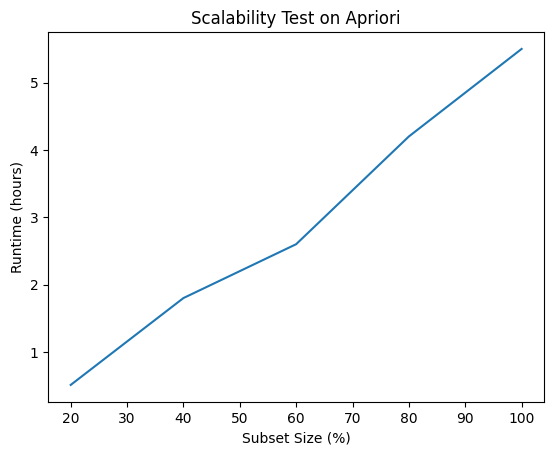

In [4]:
import matplotlib.pyplot as plt 
x = [20, 40, 60, 80, 100] 
y = [0.51, 1.8, 2.6, 4.2, 5.5] 

plt.plot(x,y)
plt.xlabel('Subset Size (%)') 
plt.ylabel('Runtime (hours)') 
plt.title('Scalability Test on Apriori') 
plt.show()